In [1]:
%cd /content/drive/MyDrive/GB500

/content/drive/MyDrive/GB500


In [8]:
import numpy as np
import keras
import matplotlib.pyplot as plt

In [2]:
base_folder = ['./outputs_unet_resnet34/', './outputs_unet_resnet50/', './outputs_unet_resnet101/', './outputs_unet_resnet152/', './outputs_unet_ACMLoss/']

In [30]:
from utils_load import dice_coef, dice_coef_loss, Active_Contour_Loss
def load_hist(f_name):
  custom_objects = [
    {'dice_coef_loss': dice_coef_loss, 'dice_coef' : dice_coef},
    {'dice_coef_loss': dice_coef_loss, 'dice_coef' : dice_coef},
    {'dice_coef_loss': dice_coef_loss, 'dice_coef' : dice_coef},
    {'dice_coef_loss': dice_coef_loss, 'dice_coef' : dice_coef},
    {'Active_Contour_Loss': Active_Contour_Loss, 'dice_coef' : dice_coef}
    ]
  
  with keras.utils.custom_object_scope(custom_objects[selection]):
    history = np.load(f_name, allow_pickle=True)

  history = history.item().history

  return history

def plot_hist(history):
  plt.plot(history['loss'], label="Training Loss")
  plt.plot(history['val_loss'], label="Validation Loss")

  rna = base_folder[selection].split('/')[1].split('_')[-1]
  plt.title(f"Training with {rna} number {iter}")

  plt.ylim((0, 1))
  plt.xlim((0, 100))
  plt.legend()

  plt.savefig(f'{base_folder[selection]}training_plot_{iter}.png')

  plt.show()

In [ ]:
iter = 0
for i in range(len(base_folder) -1):
  selection = i
  f_name = f'{base_folder[selection]}history_{iter}.npy'

  print(f_name)

  history = load_hist(f_name)
  plot_hist(history)

./outputs_unet_resnet152/history_4.npy


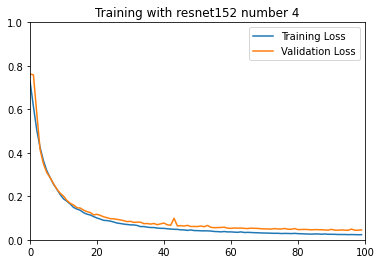

In [36]:
iter = 4
selection = 3
f_name = f'{base_folder[selection]}history_{iter}.npy'

print(f_name)

with keras.utils.custom_object_scope(custom_objects[selection]):
    history = np.load(f_name, allow_pickle=True)

#print(history)
history = load_hist(f_name)
plot_hist(history)